**Imports and Setup**

In [1]:
pf_id = 2
case = 0 #baseline
nfe = 6500
n_scenarios = 1000

In [2]:
from ema_workbench import (ScalarOutcome, Scenario, MultiprocessingEvaluator, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume, EpsilonProgress)
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.util import ema_logging
import pandas as pd
import numpy as np
ema_logging.log_to_stderr(ema_logging.INFO)

model, planning_steps = get_model_for_problem_formulation(pf_id)

In [3]:
# do nothing policy
from ema_workbench import Policy
policies = [Policy('policy 0', **{'0_RfR 0':0,
                                  '0_RfR 1':0,
                                  '0_RfR 2':0,
                                  'A.1_DikeIncrease 0':0,
                                  'A.1_DikeIncrease 1':0,
                                  'A.1_DikeIncrease 2':0,
                                  '1_RfR 0':0,
                                  '1_RfR 1':0,
                                  '1_RfR 2':0,
                                  'A.2_DikeIncrease 0':0,
                                  'A.2_DikeIncrease 1':0,
                                  'A.2_DikeIncrease 2':0,
                                  '2_RfR 0':0,
                                  '2_RfR 1':0,
                                  '2_RfR 2':0,
                                  'A.3_DikeIncrease 0':0,
                                  'A.3_DikeIncrease 1':0,
                                  'A.3_DikeIncrease 2':0,
                                  '3_RfR 0':0,
                                  '3_RfR 1':0,
                                  '3_RfR 2':0,
                                  'A.4_DikeIncrease 0':0,
                                  'A.4_DikeIncrease 1':0,
                                  'A.4_DikeIncrease 2':0,
                                  '4_RfR 0':0,
                                  '4_RfR 1':0,
                                  '4_RfR 2':0,
                                  'A.5_DikeIncrease 0':0,
                                  'A.5_DikeIncrease 1':0,
                                  'A.5_DikeIncrease 2':0,
                                  'EWS_DaysToThreat':0
                                  })]

In [4]:
#base scenario; it's the average of the range of each uncertainty
scenarios = [Scenario('baseline', **{'discount rate 0':3,
                                       'discount rate 1':3,
                                       'discount rate 2':3,
                                       'A.1_Bmax' : 190,
                                       'A.1_Brate':1.5,
                                       'A.1_pfail':0.5,
                                       'A.2_Bmax': 190,
                                       'A.2_Brate':1.5,
                                       'A.2_pfail':0.5,
                                       'A.3_Bmax' : 190,
                                       'A.3_Brate':1.5,
                                       'A.3_pfail':0.5,
                                       'A.4_Bmax':190,
                                       'A.4_Brate':1.5,
                                       'A.4_pfail':0.5,
                                       'A.5_Bmax' : 190,
                                       'A.5_Brate':1.5,
                                       'A.5_pfail':0.5,
                                       'A.0_ID flood wave shape' :66}),
             Scenario('worstcase', **{'discount rate 0':4.5,
                                       'discount rate 1':4.5,
                                       'discount rate 2':4.5,
                                       'A.1_Bmax' : 350,
                                       'A.1_Brate':10,
                                       'A.1_pfail':1,
                                       'A.2_Bmax': 350,
                                       'A.2_Brate':10,
                                       'A.2_pfail':1,
                                       'A.3_Bmax' : 350,
                                       'A.3_Brate':10,
                                       'A.3_pfail':1,
                                       'A.4_Bmax':350,
                                       'A.4_Brate':10,
                                       'A.4_pfail':1,
                                       'A.5_Bmax' : 350,
                                       'A.5_Brate':10,
                                       'A.5_pfail':1,
                                       'A.0_ID flood wave shape' :132}),
             Scenario('bestcase', **{'discount rate 0':1.5,
                                      'discount rate 1':1.5,
                                      'discount rate 2':1.5,
                                      'A.1_Bmax' :30,
                                      'A.1_Brate':1,
                                      'A.1_pfail':0,
                                      'A.2_Bmax':30,
                                      'A.2_Brate':1,
                                      'A.2_pfail':0,
                                      'A.3_Bmax' :30,
                                      'A.3_Brate':1,
                                      'A.3_pfail':0,
                                      'A.4_Bmax':30,
                                      'A.4_Brate':1,
                                      'A.4_pfail':0,
                                      'A.5_Bmax' :30,
                                      'A.5_Brate':1,
                                      'A.5_pfail':0,
                                      'A.0_ID flood wave shape' :0})]

**Set epsilons and run model with convergence**

In [5]:
epsilons= [.005, .005, .005, .005, .005]

In [6]:
convergence = [EpsilonProgress()]

# convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1e+08, 1e+09, 1e+10, 1000, .1]),
#                EpsilonProgress()]

In [7]:
with MultiprocessingEvaluator(model) as evaluator:
    output = evaluator.optimize(nfe=nfe, searchover='levers', reference = scenarios[case],
                                              epsilons=epsilons,
                                              convergence=convergence)

[MainProcess/INFO] pool started with 4 workers
6566it [1:49:34,  1.00s/it]                                                    
[MainProcess/INFO] optimization completed, found 230 solutions
[MainProcess/INFO] terminating pool


**Save files**

In [8]:
experiment_number = 1

In [9]:
import pickle
with open(f'./output/directed_search/Directed_Search_{case}_{experiment_number}.kwakkel', 'wb') as filehandler:
    pickle.dump(output, filehandler)
    filehandler.close()

In [10]:
results, convergence = output

try:
    results.to_csv(f'./output/directed_search/Directed_Search_{case}_{experiment_number}_results.csv', index=False)
    convergence.to_csv(f'./output/directed_search/Directed_Search_{case}_{experiment_number}_convergence.csv', index=False)
except:
    print("Unable to save as csv files")

In [11]:
outcomes = results.loc[:,['Expected Annual Damage','Dike Investment Costs','RfR Investment Costs','Evacuation Costs','Expected Number of Deaths']]
len(outcomes)

230

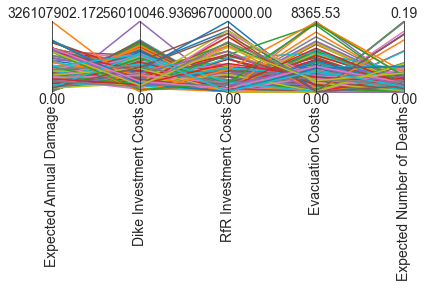

In [12]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

# we invert this axis so direction of desirability is the same
#axes.invert_axis('max_P')
plt.show()

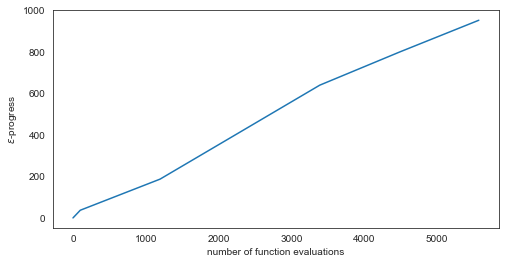

In [13]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(ncols=1, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
#ax2.plot(convergence.nfe, convergence.hypervolume)
#ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
#ax2.set_xlabel('number of function evaluations')
plt.show()

**Load files**

In [14]:
import pickle
with open(f'../final assignment/output/directed_search/Directed_Search_{case}_{experiment_number}.kwakkel', 'rb') as filehandler:
    output= pickle.load(filehandler)
    filehandler.close()

In [15]:
from ema_workbench import (ScalarOutcome, Scenario, MultiprocessingEvaluator, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume, EpsilonProgress)
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.util import ema_logging
import pandas as pd
import numpy as np
ema_logging.log_to_stderr(ema_logging.INFO)

model, planning_steps = get_model_for_problem_formulation(pf_id)

**Robustness**

In [16]:
results, convergence = output
#results = pd.DataFrame(results)
#results.columns = results.columns.str.replace(' ', '')

In [17]:
policies = results
policies = policies.drop([o.name for o in model.outcomes], axis=1)

In [18]:
from ema_workbench import Policy

policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [19]:
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 1000 scenarios * 230 policies * 1 model(s) = 230000 experiments
  0%|                                 | 371/230000 [08:35<100:35:59,  1.58s/it][MainProcess/INFO] terminating pool


KeyboardInterrupt: 

In [ ]:
from ema_workbench import save_results
import pickle

experiment_number = 2

save_results(results, f'./output/directed_search/Directed_Search_{case}_{experiment_number}.tar.gz')

with open(f'./output/directed_search/Directed_Search_{case}_{experiment_number}.kwakkel', 'wb') as filehandler:
    pickle.dump(results, filehandler)
    filehandler.close()

experiments, outcomes = results

experiments.to_csv(f'./output/directed_search/Directed_Search_{case}_{experiment_number}_exp.csv', index=False)
pd.DataFrame.from_dict(outcomes).to_csv(f'./output/directed_search/Directed_Search_{case}_{experiment_number}_out.csv', index=False)

In [ ]:
import seaborn as sns
def s_to_n(data, direction):
    mean = np.mean(data)
    std = np.std(data)

    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std


In [ ]:
import pandas as pd
experiments, outcomes = results

overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}

    logical = experiments['policy']==policy

    for outcome in model.outcomes:
        value  = outcomes[outcome.name][logical]
        sn_ratio = s_to_n(value, outcome.kind)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T

In [ ]:
from ema_workbench.analysis import parcoords

data = scores
limits = parcoords.get_limits(data)
#limits.loc[0, ['utility', 'inertia', 'reliability', 'max_P']] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
#paraxes.invert_axis('max_P')
plt.show()

In [ ]:
import numpy as np
def calculate_regret(data, best):
    return np.abs(best-data)

In [ ]:
experiments, outcomes = results

overall_regret = {}
max_regret = {}
for outcome in model.outcomes:
    policy_column = experiments['policy']

    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name],
                         "policy":experiments['policy'],
                         "scenario":experiments['scenario']})

    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario', columns='policy')

    # flatten the resulting hierarchical index resulting from
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)

    # we need to control the broadcasting.
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    #
    # basically we take the difference of the maximum across
    # the row and the actual values in the row
    #
    outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()

    overall_regret[outcome.name] = outcome_regret
    max_regret[outcome.name] = outcome_regret.max()


In [ ]:
max_regret = pd.DataFrame(max_regret)
sns.heatmap(max_regret/max_regret.max(), cmap='viridis', annot=True)
plt.show()

In [ ]:

colors = sns.color_palette()

data = max_regret

# makes it easier to identify the policy associated with each line
# in the parcoords plot
# data['policy'] = data.index.astype("float64")

limits = parcoords.get_limits(data)
#limits.loc[0, ['utility', 'inertia', 'reliability', 'max_P']] = 0

paraxes = parcoords.ParallelAxes(limits)
for i, (index, row) in enumerate(data.iterrows()):
    paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])
paraxes.legend()

plt.show()

In [ ]:
from collections import defaultdict

policy_regret = defaultdict(dict)
for key, value in overall_regret.items():
    for policy in value:
        policy_regret[policy][key] = value[policy]

In [ ]:
# this generates a 2 by 2 axes grid, with a shared X and Y axis
# accross all plots
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10),
                         sharey=True, sharex=True)

# to ensure easy iteration over the axes grid, we turn it
# into a list. Because there are four plots, I hard coded
# this.
axes = [axes[0,0], axes[0,1],
        axes[1,0],]

# zip allows us to zip together the list of axes and the list of
# key value pairs return by items. If we iterate over this
# it returns a tuple of length 2. The first item is the ax
# the second items is the key value pair.
for ax, (policy, regret) in zip(axes, policy_regret.items()):
    data = pd.DataFrame(regret)

    # we need to scale the regret to ensure fair visual
    # comparison. We can do that by divding by the maximum regret
    data = data/max_regret.max(axis=0)
    sns.boxplot(data=data, ax=ax)

    # removes top and left hand black outline of axes
    sns.despine()

    # ensure we know which policy the figure is for
    ax.set_title(str(policy))
plt.show()

**Needs to be Fixed**

the choice for box 42 is somewhat arbitrary.